In [14]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

1. עיבוד מקדים - הורדת קשתות בעלות משקל נמוך מ3, והורדת קודקודים בעלי דרגות 0 

In [15]:
### load the graph to var G
G = nx.read_gexf('net_il2015-2018.gexf')
### remove all edges with weight < 3
edges_to_remove =[]
for (u,v) in  G.edges:
    if G.edges[u, v]['weight'] <3:
        edges_to_remove.append([u,v])
G.remove_edges_from(edges_to_remove)

### remove all nodes with degree 0 
nodes_to_remove =[]
for u in G.nodes:
    if G.degree(u)== 0:
        nodes_to_remove.append(u)
G.remove_nodes_from(nodes_to_remove)

print nx.info(G)

Name: 
Type: DiGraph
Number of nodes: 102
Number of edges: 807
Average in degree:   7.9118
Average out degree:   7.9118


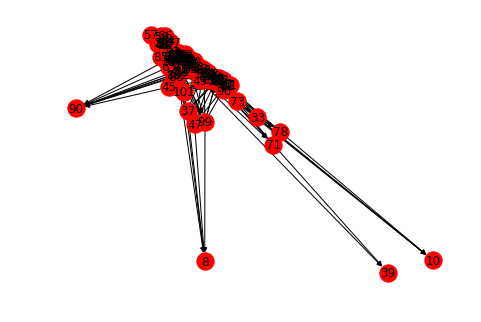

In [16]:
nx.draw_spring(G, with_labels=True)

2.	הציגו את מאפייני הגרף המרכזיים שנלמדו בכיתה (clustering coefficient, diameter, density וכדומה ). תארו בקצרה מה ניתן להסיק  ממאפיינים אלו?

density = מעיד כמה אחוז מתוך תמיכה בהצעות חוק יש בכנסת. כלומר אם הערך הוא 1 זה אומר שכולם תומכים בהצעות של כולם.
<br>
diameter = המינימום מבין המרחקים המקסימליים של שני צמתים ברשת
<br>
clustering coefficient = ערך זה הוא עבור כל קודקוד , והוא מעיד עבור כל ח"כ X כמה תמיכה בהצעות חוק יש בין כל הח"כים שתומכים בהצעה של X או שX תומך בהצעה שלהם. (כמה מתוכם תומכים גם אחד בשני, בלי קשר לX) 

In [17]:
# represent the graph as undirected graph 
udG = G.to_undirected()

density = nx.density(G)
print 'density :' , density 

diameter = nx.diameter(udG)
print 'diameter : ' , diameter
clustering_coefficient = nx.clustering(G)
print 'clustering coefficient :'
sorted(clustering_coefficient.items())

density : 0.0783343040186
diameter :  4
clustering coefficient :


[('1', 0.5),
 ('10', 0.16666666666666666),
 ('100', 0.1398989898989899),
 ('101', 0.24183006535947713),
 ('102', 0.2727272727272727),
 ('103', 0.2916666666666667),
 ('104', 0.3888888888888889),
 ('107', 0),
 ('108', 0.35),
 ('109', 0.2619047619047619),
 ('11', 0.16091954022988506),
 ('12', 0.2802197802197802),
 ('13', 0.5),
 ('14', 0.19540229885057472),
 ('15', 0.38095238095238093),
 ('16', 0.5),
 ('17', 0.13817663817663817),
 ('18', 0.2943722943722944),
 ('19', 0.0888937664618086),
 ('2', 0.36538461538461536),
 ('20', 0.20348837209302326),
 ('21', 0.2857142857142857),
 ('22', 0.25),
 ('23', 0.30357142857142855),
 ('25', 0.5),
 ('26', 0.14512195121951219),
 ('27', 0.35555555555555557),
 ('28', 0.3790849673202614),
 ('29', 0.44642857142857145),
 ('3', 0.39285714285714285),
 ('30', 0.22758620689655173),
 ('31', 0.2857142857142857),
 ('32', 0.245014245014245),
 ('33', 0.16666666666666666),
 ('34', 0.4),
 ('35', 0.29446640316205536),
 ('36', 0.1581439393939394),
 ('37', 0.16666666666666666

3.	מצאו את הח"כים המרכזיים ברשת באמצעות הפעלת מדדי המרכזיות השונים שנלמדו בכיתה. עבור כל מדד מרכזיות הציגו רשימה של ה-top10 של הצמתים המובילים והערכים שלהם. תארו בקצרה מה המשמעות כל מדד בהקשר של הרשת הנוכחית. שימו לב שוב שהקשתות מכוונות וממושקלות. 
indegree ; outdegree ; betweenness ; closness ; eigenvector

indegree = מדד זה מעיד כמה תמיכה יש לכל ח"כ, כלומר אם מדד זה גבוה זה אומר שח"כ זה קיבל הרבה תמיכה מח"כים שונים עבור הצעות חוק שהציע. 
<br>
outdegree = מדד זה מעיד עבור כל ח"כ כמה הוא תומך בהצעות חוק של ח"כים אחרים. מדד גבוה- תומך במספר רב של הצעות חוק של ח"כים שונים.
<br>
closness = מדד זה מעיד כמה כל ח"כ קרוב לשאר חברי הכנסת. ככל שהוא מרכזי יותר כך הוא קרוב יותר לכולם, והמדד גבוה. 
<br>
betweenness = מדד זה מעיד על כל קודקוד (ח"כ) V , בכמה מסלולים הכי קצרים בין כל זוג קודקודים T ו S הוא מופיע. מדד גבוה יעיד לנו על ח"כ שהוא יחסית מאוד מקושר להרבה ח"כים אחרים או לחילופין שהוא מקשר בין כמה קליקות שונות.  
eigenvector = מדד זה מעיד לכל ח"כ כמה הוא מקושר לח"כים מרכזיים. כלומר ככל שיותר ח"כ בעלי מדדי מרכזיות גבוהיים יתמכו בו המדד הזה שלו יעלה. 

In [18]:
in_degree_centrality = nx.in_degree_centrality(G)
print "indegree centrality"
sorted(in_degree_centrality.items() , key = lambda x :x[1] , reverse=True)[:10]

indegree centrality


[('57', 0.6831683168316832),
 ('19', 0.6633663366336634),
 ('93', 0.46534653465346537),
 ('100', 0.42574257425742573),
 ('56', 0.40594059405940597),
 ('26', 0.36633663366336633),
 ('36', 0.297029702970297),
 ('38', 0.27722772277227725),
 ('30', 0.27722772277227725),
 ('32', 0.24752475247524752)]

In [19]:
out_degree_centrality = nx.out_degree_centrality(G)
print "outdegree centrality "
sorted(out_degree_centrality.items() , key = lambda x :x[1] , reverse=True)[:10]

outdegree centrality 


[('20', 0.33663366336633666),
 ('53', 0.27722772277227725),
 ('82', 0.25742574257425743),
 ('35', 0.22772277227722773),
 ('108', 0.2079207920792079),
 ('38', 0.2079207920792079),
 ('69', 0.2079207920792079),
 ('41', 0.19801980198019803),
 ('22', 0.18811881188118812),
 ('49', 0.18811881188118812)]

In [20]:
closeness_centrality = nx.closeness_centrality(G)
print "closeness centrality "
sorted(closeness_centrality.items() , key = lambda x :x[1] , reverse=True)[:10]

closeness centrality 


[('57', 0.7166031987814165),
 ('19', 0.6812824139556812),
 ('93', 0.5896913220733838),
 ('100', 0.5213536279001034),
 ('56', 0.5151734685663688),
 ('30', 0.4981477739610696),
 ('17', 0.4449342194493422),
 ('26', 0.41865436543654366),
 ('11', 0.3895753211684805),
 ('7', 0.36431307364313076)]

In [21]:
betweenness_centrality = nx.betweenness_centrality(G)
print "betweenness centrality "
sorted(betweenness_centrality.items() , key = lambda x :x[1] , reverse=True)[:10]

betweenness centrality 


[('38', 0.026435855123973933),
 ('59', 0.018487768831828243),
 ('92', 0.01808641303690809),
 ('49', 0.014555099191237805),
 ('14', 0.013044699524897545),
 ('20', 0.012988164750540989),
 ('36', 0.007371404997642622),
 ('76', 0.007029848039749031),
 ('79', 0.005946750444275198),
 ('101', 0.005935997171145686)]

In [22]:
eigenvector_centrality = nx.eigenvector_centrality(udG)
print "eigenvector centrality "
sorted(eigenvector_centrality.items() , key = lambda x :x[1] , reverse=True)[:10]

eigenvector centrality 


[('57', 0.23253577139218654),
 ('19', 0.22522809132284463),
 ('38', 0.22393906870767358),
 ('20', 0.21345286980354722),
 ('93', 0.20332379000298162),
 ('76', 0.19716045482325112),
 ('49', 0.1837117912393721),
 ('59', 0.1754495201447123),
 ('26', 0.17462015398334457),
 ('100', 0.17210116022372993)]

4.	בדקו האם יש קורלציה  בין מדדי המרכזיות השונים, האם ניתן לזהות מקרים חריגים? נסו לתת הסברים מה יכול לגרום להבדלים אלו (גורמים אפשריים לדוגמה: שייכות מפלגתית, קואליציה/אופיזיציה, תפקיד הח"כ (חבר ממשלה, יו"ר ועדה בכנסת וכדומה)

אפשר לראות קורלציה בין מדד הIndegree לבין מדד הcloseness.
המשמעות של קורלציה זו היא שח"כים מסויימים מהווים נקודת מפתח עבור תמיכה של ח"כים נוספים, כלומר תמיכתם בהצעה X משמעותה תמיכה של ח"כים נוספים באותה ההצעה.

5.	האם ניתן למצוא קהילות  ברשת? הציגו סטטיסטיקות רלוונטיות לקהילות השונות, האם ניתן לזהות קשר בין הקהילות למאפיינים אמיתיים כמו השייכות המפלגתית או קואליציה/אופיזיציה – הציגו נתונים מספריים מתאימים. 

בחישוב למטה מוצגות הקהילות שמצאנו, לאור כך לא הצלחנו להראות סטטסיטיקות על קהילות אלו

In [23]:
import networkx.algorithms.community as community
#from networkx import asyn_lpa


comsLabelPropa = list(community.asyn_lpa_communities(G))
for p in comsLabelPropa:
    print p


set(['39'])
set(['90'])
set(['8'])
set(['25', '26', '27', '20', '21', '22', '23', '28', '29', '4', '59', '58', '55', '54', '57', '56', '51', '50', '53', '52', '88', '89', '82', '80', '81', '86', '87', '84', '85', '3', '7', '108', '109', '102', '103', '100', '101', '107', '104', '38', '33', '32', '31', '30', '37', '36', '35', '34', '60', '61', '62', '63', '65', '66', '67', '68', '69', '2', '6', '99', '98', '91', '93', '92', '95', '97', '96', '11', '13', '12', '15', '14', '17', '16', '19', '18', '48', '49', '46', '47', '44', '45', '42', '43', '40', '41', '1', '5', '9', '77', '76', '74', '73', '72', '71', '70', '79', '78'])
set(['10'])


6.	בהמשך לנקודה הקודמת האם מצאתם שיוכי ח"כים לקהילות שנראים  פחות הגיוניים? נסו לתת הסבר מדוע זה היה יכול לקרות לפי הקשרים בגרף.

לאור התוצאות שקיבלנו בשאלה 5 לא הצלחנו לענות על השאלה

7.	צרפו לדו"ח תרשים של הרשת הממחיש את החלוקה לקהילות ואת אחד ממדדי המרכזיות לבחירתכם. הסבירו בקצרה את מבנה התרשים. 

לאור התוצאות שקיבלנו בשאלה 5 לא הצלחנו לענות על השאלה

8.	השתמשו בשתי שיטותLink prediction  על מנת לזהות שיתופי פעולה פוטנציאלים עתידיים בין הח"כים השונים. הציגו את שיתופי הפעולה הסבירים ביותר. תארו האם לדעתכם התוצאות הגיוניות? אילו פילטרים נוספים הייתם משלבים על-מנת לסנן חלק מהתחזיות?

In [24]:
preds_pa = nx.preferential_attachment(udG)

pred_pa_dict = {}
for u, v, p in preds_pa:
    pred_pa_dict[(u,v)] = p

sorted(pred_pa_dict.items(), key=lambda x:x[1], reverse=True)[:10]

[(('57', '19'), 4692),
 (('93', '19'), 3264),
 (('57', '100'), 3105),
 (('26', '57'), 2829),
 (('36', '19'), 2244),
 (('56', '93'), 2160),
 (('19', '79'), 2108),
 (('57', '11'), 2070),
 (('57', '63'), 2001),
 (('26', '93'), 1968)]

In [25]:
preds_aa = nx.adamic_adar_index(udG)

pred_aa_dict = {}
for u, v, p in preds_aa:
    pred_aa_dict[(u,v)] = p

sorted(pred_aa_dict.items(), key=lambda x:x[1], reverse=True)[:10]

[(('57', '19'), 16.86292189338152),
 (('93', '19'), 12.80071502462538),
 (('26', '57'), 10.118470633902767),
 (('26', '93'), 9.10961924226769),
 (('57', '100'), 8.71500807286067),
 (('14', '49'), 8.668548680050838),
 (('19', '79'), 8.408444985311531),
 (('36', '19'), 8.013251233619751),
 (('26', '56'), 7.975861988132459),
 (('53', '82'), 7.1581624441787)]

הקשרים שחוזרים על עצמם בין התוצאות: <br> 
[הדירוג שמופיע ברשימה 1 : הדירוג שמופיע ברשימה 2]  (מספר קודקוד א'{שם ח"כ} ,מספר קודקוד ב' {שם ח"כ} )  <br> 
[1 ,1] (19 {דוד ביטן} , 57 {מירי רגב} ) <br>
[2 ,2] (19 {דוד ביטן} , 93 {יריב לוין} ) <br>
[3 ,4] (26 {אלי אללוף} , 57 {מירי רגב} ) <br>
[4 ,10] (93 {יריב לוין},  26 {אלי אללוף} ) <br>
[5 ,3] (100 {יואב קיש} , 57 {מירי רגב} ) <br>
[7 ,7] (19 {דוד ביטן} , 79 {סתיו שפיר} ) <br>
[8 ,5] (19 {דוד ביטן} , 36 {יצחק הרצוג} ) <br>
ניתן לראות שני קישורים שלא ניראים הגיוניים- שהם סתיו שפיר ודוד ביטן ושל יצחק הרצוג ודוד ביטן. פילטר נוסף שהיינו מוסיפים הוא של קואליצה/אופוזיציה או של ימין/שמאל. יתכן כי במידה והיינו מוסיפים פילטרים אלו היינו נמנעים מחיזוי קשרים אלו.

9.	צרפו לדו"ח קובץ אקסל שבו לכל צומת יופיע שם הח"כ, שייכות מפלגתית, תוצאות מדדיי המרכזיות והשייכות לקהילה בגרף

In [26]:
def Extract(lst , i): 
    return [item[i] for item in lst] 

def Extract_info(lst , string): 
    return [item[1][string] for item in lst] 

in_degree = sorted(in_degree_centrality.items())
out_degree = sorted(out_degree_centrality.items())
between = sorted(betweenness_centrality.items())
close = sorted(closeness_centrality.items())
eigen = sorted(eigenvector_centrality.items())
nodes_data = sorted(list(G.nodes.data()))

df = pd.DataFrame({'node number': Extract(nodes_data,0) ,
                   'in degree': Extract(in_degree,1) ,
                   'out degree': Extract(out_degree,1) ,
                   'betweenness': Extract(between,1) ,
                   'closeness': Extract(close,1) ,
                   'eigenvector': Extract(eigen,1) ,
                   'minister name' : Extract_info (nodes_data ,'label') ,
                   'party' : Extract_info (nodes_data ,'party') #, TODO: add the partition 
                  })
writer = pd.ExcelWriter('Report.xlsx', engine='xlsxwriter')
df.to_excel(writer, sheet_name='Sheet1', index=False)
writer.save()

10.	במידה ותוכן הצעות החוק היה זמין לצרכי התרגיל – כיצד הייתם משתמשים במידע זה על מנת להעשיר את הניתוח. 

ניתן היה להוסיף ניתוחים על בסיס נושאי הצעות החוק לדוגמה- חוקים חברתיים , כלכליים וכו'. ניתוח כזה מאפשר לח"כים מידע מי מהח"כים יתמוך בהצעה זו ועל כן יפנו אליו במידה וירצו להעביר חוק בנושא מסויים.

11.	בתרגיל זה מדדנו את הזיקה בין הח"כים לפי הצעות החוק עליהם הם חתומים, חשבו על מקור נתונים אחר שממנו היה אפשר למדל את האינטקרציה בין הח"כים בתור רשת. תארו את המשמעות של קשת בין שני ח"כים ואת מאפייניה (האם היא מכוונת או לא, האם היא ממושקלת או לא, האם יש לה תכונות נוספות).

פעילות בטוויטר - כל ח"כ יהווה קודקוד וקשת בין שני ח"כים תהווה התקשרות בינהם:
<br>
מקרה 1: ח"כ א' הזכיר את ח"כ ב' בציוץ שהוא כתב יהווה קשת מכוונת בין א' לב'.
<br>
מקרה 2: ח"כ א' הגיב לח"כ ב' על ציוץ יהווה קשת מכוונת בין א לב'.
<br>
שני המקרים יסכמו למשקל הקשת בין ח"כ א' לח"כ ב'. 